## **80 CEREALS DATA ANALYSIS REPORT**
*The 80 Cereals Data Analysis Report aims to provide a comprehensive evaluation of various cereal products by analyzing their nutritional values, exploring relationships among key attributes, and identifying trends related to calories, sugars, and ratings to inform consumers and manufacturers about cereal quality.*

**Step 1: DATA LOADING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cereal.csv' 
cereal_data = pd.read_csv(file_path)

**Step 2: DATA CHECKING**

*This step involves checking*<br>
*1. Missing values, which may affect analysis.*<br>
*2. Duplicate entries, which could distort results.*<br>
*3. Data types of each column to ensure the values are correctly stored (e.g., calories should be numeric)*

In [2]:
# Check for missing values
print("\nMissing Values:\n", cereal_data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", cereal_data.duplicated().sum())

# Check data types
print("\nData types:\n", cereal_data.dtypes)


Missing Values:
 name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Number of duplicates: 0

Data types:
 name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


**Step 3: DATA CLEANING**<BR>

*Now, we clean the data by:*<br>
*1.  Filling missing values (if any) with a placeholder (like 0) or more appropriate values based on the context.*<br>
*2. Removing duplicates to prevent skewed analysis.*<br>
*3. Ensuring correct data types for important columns such as calories and sugars.*<br>

In [3]:
# Data Cleaning
# Handle missing values (if any, by replacing or removing rows)
cereal_data.fillna(0, inplace=True)  # Fill missing values with 0 or a more suitable value

# Remove duplicates
cereal_data.drop_duplicates(inplace=True)

# Ensure correct data types for numerical columns
cereal_data['sugars'] = pd.to_numeric(cereal_data['sugars'], errors='coerce')
cereal_data['calories'] = pd.to_numeric(cereal_data['calories'], errors='coerce')

# Check data again after cleaning
print("\nCleaned Data Info:\n", cereal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB

Cleaned Data Info:
 None


**Step 4: NUTRITIONAL ANALYSIS**<BR>

*We analyze the cereals based on their nutritional values:*<BR>
*1. **Highest and Lowest Calories**: Identify cereals with extreme calorie values.*<BR>
*2. **Highest and Lowest Sugars**: Find cereals with the most and least sugar content*<BR>

In [5]:

# Cereals with highest and lowest values for calories 

high_calories = cereal_data.loc[cereal_data['calories'].idxmax()]
low_calories = cereal_data.loc[cereal_data['calories'].idxmin()]

# Cereals  with highest and lowest values for sugar
high_sugars = cereal_data.loc[cereal_data['sugars'].idxmax()]
low_sugars = cereal_data.loc[cereal_data['sugars'].idxmin()]

# Print results
print(f"Cereal Highest with highest Calories: {high_calories['name']}, {high_calories['calories']} cal")
print(f"Cereal with Lowest Calories: {low_calories['name']}, {low_calories['calories']} cal")
print(f"Highest Sugars Cereal: {high_sugars['name']}, {high_sugars['sugars']} g")
print(f"Lowest Sugars Cereal: {low_sugars['name']}, {low_sugars['sugars']} g")

Cereal Highest with highest Calories: Mueslix Crispy Blend, 160 cal
Cereal with Lowest Calories: All-Bran with Extra Fiber, 50 cal
Highest Sugars Cereal: Golden Crisp, 15 g
Lowest Sugars Cereal: Quaker Oatmeal, -1 g


**Step 5: CORRELATIONAL ANALYSIS Analysis**<BR>

*We calculate the correlation matrix for the numerical attributes in the dataset. This shows how variables like calories, sugars, and rating are related. A high positive or negative correlation indicates a strong relationship.*

In [8]:
# Select only numeric columns for correlation analysis
numeric_columns = cereal_data.select_dtypes(include=['float64', 'int64'])

# Perform correlation analysis on the numeric columns
correlation = numeric_columns.corr()

# Display correlation matrix
print("\nCorrelation Matrix:\n", correlation)



Correlation Matrix:
           calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.250681   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.130864   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.318043   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.355983   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.356083   
carbo     0.250681 -0.130864 -0.318043  0.355983 -0.356083  1.000000   
sugars    0.562340 -0.329142  0.270819  0.101451 -0.141205 -0.331665   
potass   -0.066609  0.549407  0.193279 -0.032603  0.903374 -0.349685   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.258148   
shelf     0.097234  0.133865  0.263691 -0.069719  0.297539 -0.101790   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.135136   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.363932   
rating   -0.689376  0.470618 -0.409284 -0.

**Step 6: Visualization of Distributions**<BR>

*Next, we visualize the distribution of main attributes:*

**Calories Distribution**: *The distribution of cereal calorie counts.*<br>
**Sugars Distribution:** *The amount of sugar in different cereals.*<br>
**Ratings Distribution:** *How ratings vary across different cereals*<br>


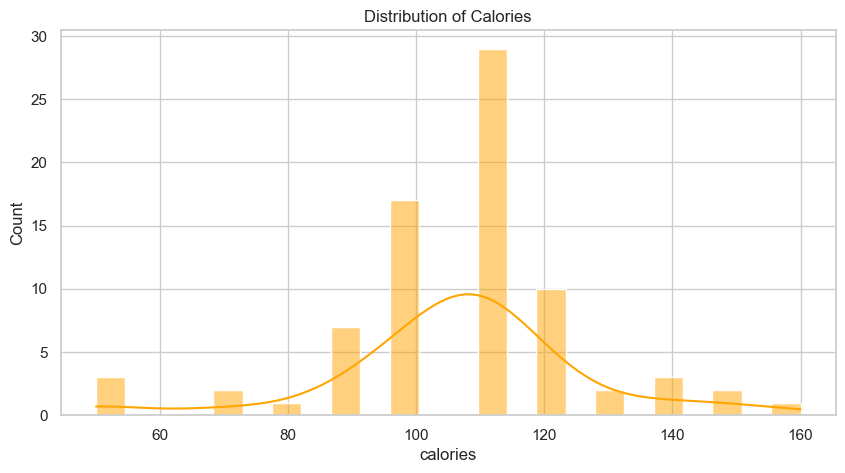

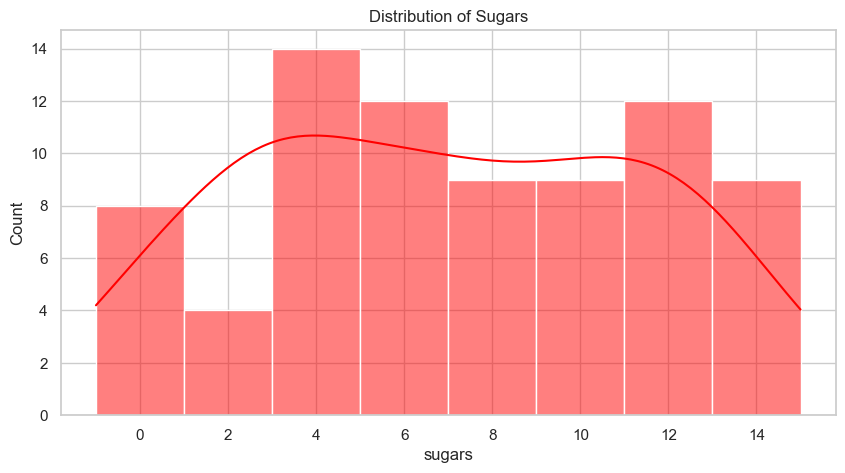

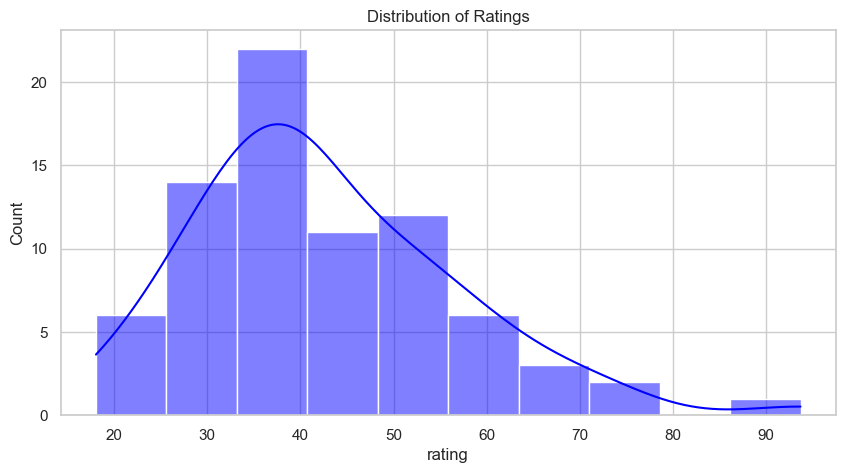

In [19]:
# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of Calories
plt.figure(figsize=(10,5))
sns.histplot(cereal_data['calories'], kde=True, color='orange')
plt.title('Distribution of Calories')
plt.show()

# Distribution of Sugars
plt.figure(figsize=(10,5))
sns.histplot(cereal_data['sugars'], kde=True, color='red')
plt.title('Distribution of Sugars')
plt.show()

# Distribution of Ratings
plt.figure(figsize=(10,5))
sns.histplot(cereal_data['rating'], kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.show()


**Step 7: CORRELATION HEATMAP VISUALIZATION**<BR>
*We visualize the correlation matrix using a heatmap to get a better sense of the relationships between the variables. Darker shades represent stronger correlations.*


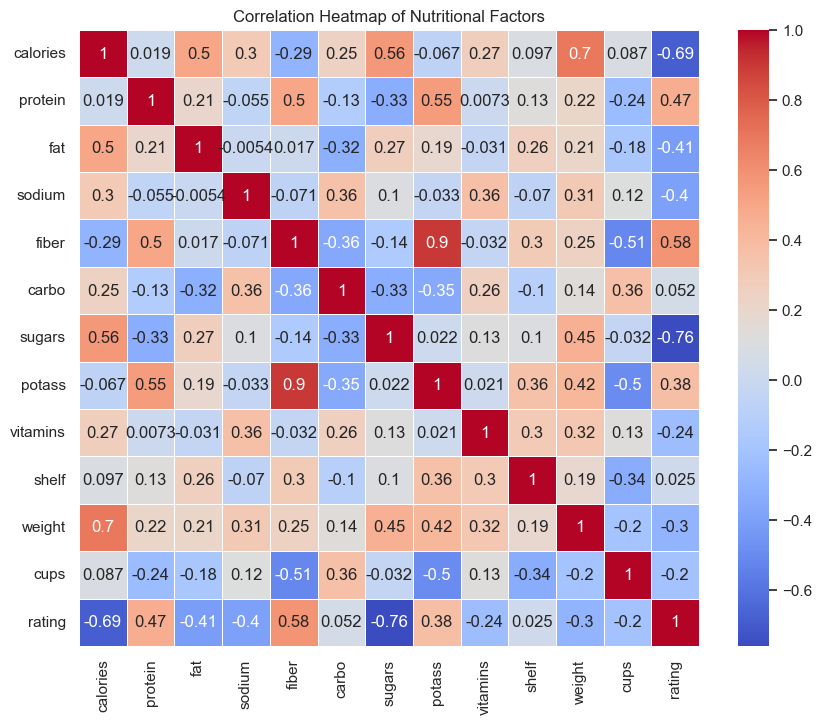

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Factors')
plt.show()

**Step 8: MANUFACTURER COMPARISON** <BR>

*We analyze the average nutritional values by manufacturer to see which manufacturers tend to have higher calories or sugars in their cereals.*

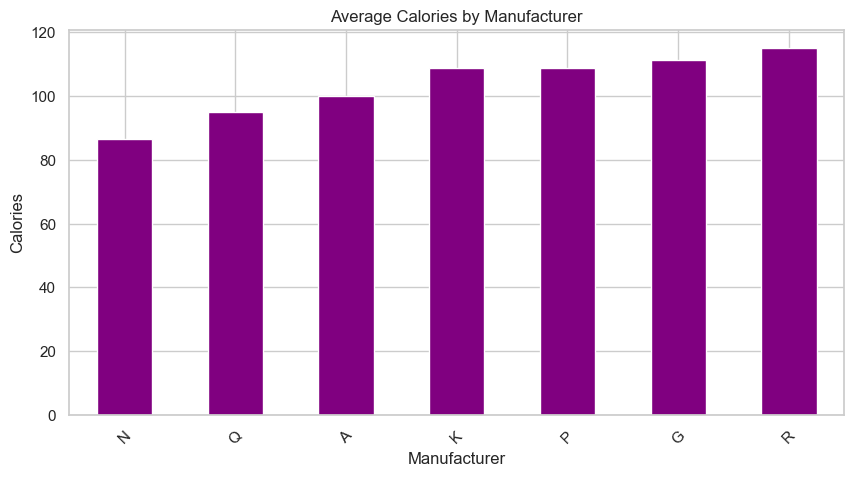

In [22]:
# Group data by manufacturer, but select only numeric columns for aggregation
numeric_columns = cereal_data.select_dtypes(include=['float64', 'int64']).columns
mfr_group = cereal_data.groupby('mfr')[numeric_columns].mean()

# Bar plot: Average calories by manufacturer
plt.figure(figsize=(10, 5))
mfr_group['calories'].sort_values().plot(kind='bar', color='purple')
plt.title('Average Calories by Manufacturer')
plt.ylabel('Calories')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.show()


**Step 9: RATING VS. SUGAERS SCATTER PLOT**<BR>

*This scatter plot visualizes the relationship between rating and sugar content across cereals. We color code by manufacturer to see if certain manufacturers tend to have high-sugar, low-rated cereals.*

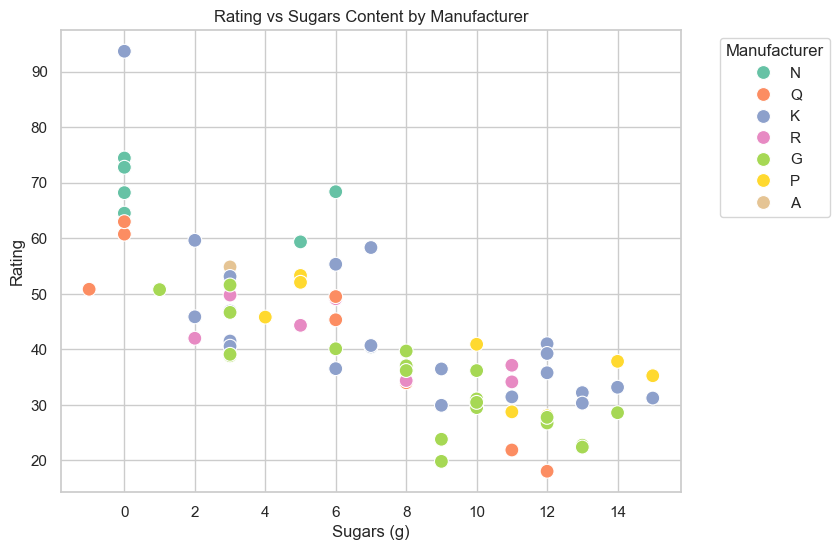

In [23]:
# Scatter plot: Rating vs Sugars
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sugars', y='rating', data=cereal_data, hue='mfr', palette='Set2', s=100)
plt.title('Rating vs Sugars Content by Manufacturer')
plt.xlabel('Sugars (g)')
plt.ylabel('Rating')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Step 10: RATING VS. FIBER SCATTER PLOT**<BR>

*This scatter plot shows the relationship between fiber content and rating, helping to see if cereals high in fiber tend to receive better ratings*.

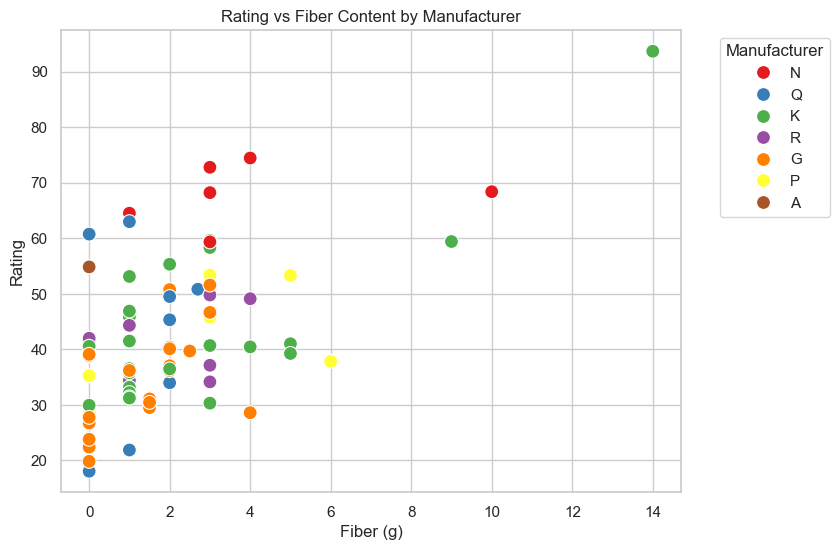

In [24]:
# Scatter plot: Rating vs Fiber
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fiber', y='rating', data=cereal_data, hue='mfr', palette='Set1', s=100)
plt.title('Rating vs Fiber Content by Manufacturer')
plt.xlabel('Fiber (g)')
plt.ylabel('Rating')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Step 11: SUMMARY**


In [33]:
# Final Summary
print("\nSummary of Key Insights:\n")
print(f"1. The cereal with the highest calories is '{high_calories['name']}' with {high_calories['calories']} calories.\n")
print(f"2. The cereal with the lowest calories is '{low_calories['name']}' with {low_calories['calories']} calories.\n")
print(f"3. The cereal with the highest sugar content is '{high_sugars['name']}' with {high_sugars['sugars']} grams of sugar.\n")
print(f"4. The cereal with the lowest sugar content is '{low_sugars['name']}' with {low_sugars['sugars']} grams of sugar.\n")
print(f"5. Manufacturers like '{mfr_group['calories'].idxmax()}' have higher calorie cereals on average.")



Summary of Key Insights:

1. The cereal with the highest calories is 'Mueslix Crispy Blend' with 160 calories.

2. The cereal with the lowest calories is 'All-Bran with Extra Fiber' with 50 calories.

3. The cereal with the highest sugar content is 'Golden Crisp' with 15 grams of sugar.

4. The cereal with the lowest sugar content is 'Quaker Oatmeal' with -1 grams of sugar.

5. Manufacturers like 'R' have higher calorie cereals on average.
